In [117]:
import pandas as pd
import numpy as np
import codecs
import seaborn as sns

In [125]:
product = pd.read_csv('product.csv', encoding = "ISO-8859-1")
#package = pd.read_csv('package.csv')

In [126]:
# convert time into time format
product['ENDMARKETINGDATE'] = pd.to_datetime(product['ENDMARKETINGDATE'], format='%Y%m%d', errors='ignore')
# remove all the products which are out of date
product = product[(product['ENDMARKETINGDATE']>'2019-03-16') | (product['ENDMARKETINGDATE'].isnull())]
product['STARTMARKETINGDATE'] = pd.to_datetime(product['STARTMARKETINGDATE'], format='%Y%m%d', errors='ignore')
product['LISTING_RECORD_CERTIFIED_THROUGH'] = pd.to_datetime(product['LISTING_RECORD_CERTIFIED_THROUGH'], format='%Y%m%d', errors='ignore')
product

,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC_EXCLUDE_FLAG,LISTING_RECORD_CERTIFIED_THROUGH
0,0002-0800_4bb5d1cb-0fa7-48c7-9f6d-8d45f9b91649,0002-0800,HUMAN OTC DRUG,Sterile Diluent,NaN,diluent,"INJECTION, SOLUTION",SUBCUTANEOUS,1987-07-10,NaT,NDA,NDA018781,Eli Lilly and Company,WATER,1,mL/mL,NaN,NaN,N,2019-12-31
1,0002-1200_957ee1b5-dfa7-4e3f-96e1-6bed1ffc0abe,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,2012-06-01,NaT,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN,N,2019-12-31
2,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,NaN,Quinidine Gluconate,SOLUTION,INTRAVENOUS,1950-07-12,NaT,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",NaN,N,2019-12-31
3,0002-1433_7b0ec07f-bffa-467f-978a-45b1315107e5,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,2014-09-18,NaT,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,N,2019-12-31
4,0002-1434_7b0ec07f-bffa-467f-978a-45b1315107e5,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,2014-09-18,NaT,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,N,2019-12-31
5,0002-1436_ad6f74e8-b0ef-4a96-9249-c1225c5cd6a7,0002-1436,HUMAN PRESCRIPTION DRUG,EMGALITY,NaN,galcanezumab,"INJECTION, SOLUTION",SUBCUTANEOUS,2018-09-27,NaT,BLA,BLA761063,Eli Lilly and Company,GALCANEZUMAB,120,mg/mL,NaN,NaN,N,2020-12-31
6,0002-1445_e779cf1f-265c-4fed-931d-102fbaf7e14b,0002-1445,HUMAN PRESCRIPTION DRUG,TALTZ,NaN,ixekizumab,"INJECTION, SOLUTION",SUBCUTANEOUS,2016-03-22,NaT,BLA,BLA125521,Eli Lilly and Company,IXEKIZUMAB,80,mg/mL,"Interleukin-17A Antagonist [EPC],Interleukin-1...",NaN,N,2019-12-31
8,0002-2377_ad6f74e8-b0ef-4a96-9249-c1225c5cd6a7,0002-2377,HUMAN PRESCRIPTION DRUG,EMGALITY,NaN,galcanezumab,"INJECTION, SOLUTION",SUBCUTANEOUS,2018-09-27,NaT,BLA,BLA761063,Eli Lilly and Company,GALCANEZUMAB,120,mg/mL,NaN,NaN,N,2020-12-31
9,0002-3004_f1404e9d-0c95-44e4-9eb0-7a2836a67bd8,0002-3004,HUMAN PRESCRIPTION DRUG,Prozac,Weekly,Fluoxetine hydrochloride,"CAPSULE, DELAYED RELEASE",ORAL,2001-03-16,NaT,NDA,NDA021235,Eli Lilly and Company,FLUOXETINE HYDROCHLORIDE,90,mg/1,"Serotonin Reuptake Inhibitor [EPC],Serotonin U...",NaN,N,2019-12-31
10,0002-3227_f1ee27ad-c38e-430a-b027-0b7ebad7403e,0002-3227,HUMAN PRESCRIPTION DRUG,Strattera,NaN,Atomoxetine hydrochloride,CAPSULE,ORAL,2002-11-26,NaT,NDA,NDA021411,Eli Lilly and Company,ATOMOXETINE HYDROCHLORIDE,10,mg/1,"Norepinephrine Reuptake Inhibitor [EPC],Norepi...",NaN,N,2020-12-31


In [127]:
# drop useless column
product = product.drop(columns=['DEASCHEDULE'])
product = product.drop(columns=['NDC_EXCLUDE_FLAG'])
product = product.drop(columns=['PROPRIETARYNAMESUFFIX'])
product

,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,LISTING_RECORD_CERTIFIED_THROUGH
0,0002-0800_4bb5d1cb-0fa7-48c7-9f6d-8d45f9b91649,0002-0800,HUMAN OTC DRUG,Sterile Diluent,diluent,"INJECTION, SOLUTION",SUBCUTANEOUS,1987-07-10,NaT,NDA,NDA018781,Eli Lilly and Company,WATER,1,mL/mL,NaN,2019-12-31
1,0002-1200_957ee1b5-dfa7-4e3f-96e1-6bed1ffc0abe,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,2012-06-01,NaT,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",2019-12-31
2,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,Quinidine Gluconate,SOLUTION,INTRAVENOUS,1950-07-12,NaT,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",2019-12-31
3,0002-1433_7b0ec07f-bffa-467f-978a-45b1315107e5,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,2014-09-18,NaT,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",2019-12-31
4,0002-1434_7b0ec07f-bffa-467f-978a-45b1315107e5,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,2014-09-18,NaT,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",2019-12-31
5,0002-1436_ad6f74e8-b0ef-4a96-9249-c1225c5cd6a7,0002-1436,HUMAN PRESCRIPTION DRUG,EMGALITY,galcanezumab,"INJECTION, SOLUTION",SUBCUTANEOUS,2018-09-27,NaT,BLA,BLA761063,Eli Lilly and Company,GALCANEZUMAB,120,mg/mL,NaN,2020-12-31
6,0002-1445_e779cf1f-265c-4fed-931d-102fbaf7e14b,0002-1445,HUMAN PRESCRIPTION DRUG,TALTZ,ixekizumab,"INJECTION, SOLUTION",SUBCUTANEOUS,2016-03-22,NaT,BLA,BLA125521,Eli Lilly and Company,IXEKIZUMAB,80,mg/mL,"Interleukin-17A Antagonist [EPC],Interleukin-1...",2019-12-31
8,0002-2377_ad6f74e8-b0ef-4a96-9249-c1225c5cd6a7,0002-2377,HUMAN PRESCRIPTION DRUG,EMGALITY,galcanezumab,"INJECTION, SOLUTION",SUBCUTANEOUS,2018-09-27,NaT,BLA,BLA761063,Eli Lilly and Company,GALCANEZUMAB,120,mg/mL,NaN,2020-12-31
9,0002-3004_f1404e9d-0c95-44e4-9eb0-7a2836a67bd8,0002-3004,HUMAN PRESCRIPTION DRUG,Prozac,Fluoxetine hydrochloride,"CAPSULE, DELAYED RELEASE",ORAL,2001-03-16,NaT,NDA,NDA021235,Eli Lilly and Company,FLUOXETINE HYDROCHLORIDE,90,mg/1,"Serotonin Reuptake Inhibitor [EPC],Serotonin U...",2019-12-31
10,0002-3227_f1ee27ad-c38e-430a-b027-0b7ebad7403e,0002-3227,HUMAN PRESCRIPTION DRUG,Strattera,Atomoxetine hydrochloride,CAPSULE,ORAL,2002-11-26,NaT,NDA,NDA021411,Eli Lilly and Company,ATOMOXETINE HYDROCHLORIDE,10,mg/1,"Norepinephrine Reuptake Inhibitor [EPC],Norepi...",2020-12-31


In [129]:
product = product.drop_duplicates(['PRODUCTNDC','ACTIVE_NUMERATOR_STRENGTH'])
product

,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,LISTING_RECORD_CERTIFIED_THROUGH
0,0002-0800_4bb5d1cb-0fa7-48c7-9f6d-8d45f9b91649,0002-0800,HUMAN OTC DRUG,Sterile Diluent,diluent,"INJECTION, SOLUTION",SUBCUTANEOUS,1987-07-10,NaT,NDA,NDA018781,Eli Lilly and Company,WATER,1,mL/mL,NaN,2019-12-31
1,0002-1200_957ee1b5-dfa7-4e3f-96e1-6bed1ffc0abe,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,2012-06-01,NaT,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",2019-12-31
2,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,Quinidine Gluconate,SOLUTION,INTRAVENOUS,1950-07-12,NaT,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",2019-12-31
3,0002-1433_7b0ec07f-bffa-467f-978a-45b1315107e5,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,2014-09-18,NaT,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",2019-12-31
4,0002-1434_7b0ec07f-bffa-467f-978a-45b1315107e5,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,2014-09-18,NaT,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",2019-12-31
5,0002-1436_ad6f74e8-b0ef-4a96-9249-c1225c5cd6a7,0002-1436,HUMAN PRESCRIPTION DRUG,EMGALITY,galcanezumab,"INJECTION, SOLUTION",SUBCUTANEOUS,2018-09-27,NaT,BLA,BLA761063,Eli Lilly and Company,GALCANEZUMAB,120,mg/mL,NaN,2020-12-31
6,0002-1445_e779cf1f-265c-4fed-931d-102fbaf7e14b,0002-1445,HUMAN PRESCRIPTION DRUG,TALTZ,ixekizumab,"INJECTION, SOLUTION",SUBCUTANEOUS,2016-03-22,NaT,BLA,BLA125521,Eli Lilly and Company,IXEKIZUMAB,80,mg/mL,"Interleukin-17A Antagonist [EPC],Interleukin-1...",2019-12-31
8,0002-2377_ad6f74e8-b0ef-4a96-9249-c1225c5cd6a7,0002-2377,HUMAN PRESCRIPTION DRUG,EMGALITY,galcanezumab,"INJECTION, SOLUTION",SUBCUTANEOUS,2018-09-27,NaT,BLA,BLA761063,Eli Lilly and Company,GALCANEZUMAB,120,mg/mL,NaN,2020-12-31
9,0002-3004_f1404e9d-0c95-44e4-9eb0-7a2836a67bd8,0002-3004,HUMAN PRESCRIPTION DRUG,Prozac,Fluoxetine hydrochloride,"CAPSULE, DELAYED RELEASE",ORAL,2001-03-16,NaT,NDA,NDA021235,Eli Lilly and Company,FLUOXETINE HYDROCHLORIDE,90,mg/1,"Serotonin Reuptake Inhibitor [EPC],Serotonin U...",2019-12-31
10,0002-3227_f1ee27ad-c38e-430a-b027-0b7ebad7403e,0002-3227,HUMAN PRESCRIPTION DRUG,Strattera,Atomoxetine hydrochloride,CAPSULE,ORAL,2002-11-26,NaT,NDA,NDA021411,Eli Lilly and Company,ATOMOXETINE HYDROCHLORIDE,10,mg/1,"Norepinephrine Reuptake Inhibitor [EPC],Norepi...",2020-12-31


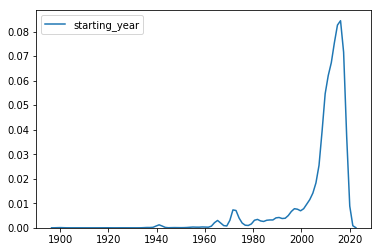

In [162]:
product['starting_year'] = product['STARTMARKETINGDATE'].dt.year
sns.kdeplot(product['starting_year'].dropna())

In [163]:
product.groupby('PRODUCTTYPENAME').size()

PRODUCTTYPENAME
CELLULAR THERAPY                   7
HUMAN OTC DRUG                 62049
HUMAN PRESCRIPTION DRUG        54871
NON-STANDARDIZED ALLERGENIC     2640
PLASMA DERIVATIVE                311
STANDARDIZED ALLERGENIC          147
VACCINE                          102
dtype: int64

In [191]:
mean_start_year = product.groupby('DOSAGEFORMNAME').mean()
mean_start_year

,LISTING_RECORD_CERTIFIED_THROUGH,product_start_year,starting_year
DOSAGEFORMNAME,,,
AEROSOL,2.018701e+07,2011.875000,2011.875000
"AEROSOL, FOAM",2.018483e+07,2009.172794,2009.172794
"AEROSOL, METERED",2.018836e+07,2011.075000,2011.075000
"AEROSOL, POWDER",2.018965e+07,2010.157895,2010.157895
"AEROSOL, SPRAY",2.018857e+07,2014.374459,2014.374459
"BAR, CHEWABLE",2.019012e+07,2014.666667,2014.666667
CAPSULE,2.018791e+07,2009.566984,2009.566984
"CAPSULE, COATED",2.018568e+07,2010.611111,2010.611111
"CAPSULE, COATED PELLETS",2.019243e+07,2008.760000,2008.760000


In [200]:
# This is the newest tech
mean_start_year['product_start_year'].idxmax()

'INJECTION, LIPID COMPLEX'

In [201]:
# The oldest tech
mean_start_year['product_start_year'].idxmin()

'INJECTION, SOLUTION'

# Data set and motivation:

Our dataset is about the drug products in the United States. The reason we collect the data is that sometimes we wish to purchase OTC drugs, there is no list about the dosage and the curative effect, so it is hard to purchase the right drugs. We need to search each individual drug we wish to purchase. Thus, we want to reorganize this raw dataset as a guide of drugs. 
    
The data contains: ProductID which is the concatenation of the NDCproduct code and SPL documentID, ProductNDC which is the labeler code and product code segments of the National Drug Code number, ProductTypeName which is the type of product, ProprietaryName which is the trade name, ProprietaryNameSuffix which is the suffix to the proprietary name, NonProprietaryName which is the active ingredient(s) of the product, DosageFormName which is the translation of the DosageForm Code, RouteName which is the translation of the Route Code, StartMarketingDate which is the starting date of its marketing of the drug product, EndMarketingDate which is the ending date the product will no longer be available on the market, MarketingCategoryName which is the final marketed product categories, LabelerName which is the name of the company, SubstanceName which is the active ingredient list, StrengthNumber which is the strength values of each active ingredient, StrengthUnit which is the units to be used with the strength values, Pharm_Classes which is the reported pharmacological class categories, DEASchedule which is the assigned DEA Schedule number, NDC_Exclude_Flag which is check whether the product has been removed/excluded from the NDC Directory for failure to respond to FDA’s requests for correction to deficient or non-compliant submissions, Listing_Record_Certified_Through which it the date when the listing record will expire.

# Actual task definition/Research question:

There are several real-world questions we wish to solve; the first question is the data is a raw data so there are a lot of duplication and misleading. For example, the data contains two different drugs but with same curative effect or two different drugs with same name but different curative effect. Also, it contains drugs which is not approved to use today. If people read the raw data and wish to purchase the medicine, the duplicate and misleading parts make people do not know what the right medicine is to choose. The raw dataset will cause a lot of trouble. if people wish to purchase a medicine in a rush, read the raw dataset will waste lots of time on finding the right medicine. Thus, our goal is to make this dataset readable and remove all the misleading and duplicate part so that this dataset will become the guide for people to purchase medicine in the United States. Also, it is easier for doctors to offer prescriptions because the dataset is more readable.

The second is that we want to make some visualizations about each type of medicine, we want to know which type of drug is popular in our world and which type of drug have better prospects. This can let the drug manufactures know which type of drug they can make in the future. 

The third is that we wish to combine the same curative effect drug by the OTC drug dosage name, and we want to make the distribution of all the OTC drug dosage name. The reason is that OTC drug is people normally use. However, sometimes before people purchase the drug, they need to know how to use the drug. For example, if someone allergy with capsule they need to purchase other form of drug with the same effect. Thus, it is better to combine the drugs. Also, we want to make the distribution to analyze which type of drug dosage name is the most popular one so drug manufactures based on the type of medicine and the dosage name to make medicine in the future.